Part 4

#Using Auto-PyTorch

Auto-PyTorch jointly and robustly optimizes the network architecture and the training hyperparameters to enable fully automated deep learning (AutoDL).

Auto-PyTorch is mainly developed to support tabular data (classification, regression) and time series data (forecasting). 

In [ ]:
!pip install torch

!pip install git+https://github.com/shukon/HpBandSter.git
!pip install git+https://github.com/automl/Auto-PyTorch.git

In [ ]:
!pip install -U scikit-learn

In [ ]:
! sudo apt install msttcorefonts -qq
! rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [ ]:
from autoPyTorch.api.tabular_regression import TabularRegressionTask

# Data Preparation

In [ ]:
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')
sklearn.model_selectionX = pd.read_csv('X.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train=X_train.values

Y_train=Y_train.values

X_test=X_test.values

Y_test=Y_test.values

scaler=StandardScaler()

scaler.fit(X_train)

#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)

# Looking got the best model

In [ ]:
api = TabularRegressionTask()

In [ ]:
api.search(
    X_train=X_train_s,
    y_train=Y_train,
    X_test=X_test_s.copy(),
    y_test=Y_test.copy(),
    optimize_metric='r2',
    total_walltime_limit=300,
    func_eval_time_limit_secs=50,
    dataset_name="Bodyfat"
)

/usr/local/lib/python3.10/dist-packages/autoPyTorch/pipeline/components/preprocessing/tabular_preprocessing/feature_preprocessing/Nystroem.py:130: UserWarning: Given choices for `score_func` are not compatible with the dataset. Updating choices to ['poly', 'rbf', 'sigmoid', 'cosine']
  warnings.warn(f"Given choices for `score_func` are not compatible with the dataset. "


[ERROR] [2023-05-04 23:40:35,326:Client-AutoPyTorch:Bodyfat:1] Prediction for lgb failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autoPyTorch/evaluation/tae.py", line 61, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 512, in eval_train_function
    evaluator.fit_predict_and_loss()
  File "/usr/local/lib/python3.10/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 186, in fit_predict_and_loss
    y_train_pred, y_opt_pred, y_valid_pred, y_test_pred = self._fit_and_predict(pipeline, split_id,
  File "/usr/local/lib/python3.10/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 364, in _fit_and_predict
    fit_and_suppress_warnings(self.logger, pipeline, X, y)
  File "/usr/local/lib/python3.10/dist-packages/autoPyTorch/evaluation/abstract_evaluator

/usr/local/lib/python3.10/dist-packages/smac/intensification/parallel_scheduling.py:154: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  warnings.warn(


In [ ]:
# Print statistics from search
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: Bodyfat
	Optimisation Metric: r2
	Best validation score: 0.7067779040639525
	Number of target algorithm runs: 36
	Number of successful target algorithm runs: 15
	Number of crashed target algorithm runs: 19
	Number of target algorithms that exceeded the time limit: 1
	Number of target algorithms that exceeded the memory limit: 1



Refiting the models on the full dataset:

In [ ]:
api.refit(
    X_train=X_train_s,
    y_train=Y_train,
    X_test=X_test_s,
    y_test=Y_test,
    dataset_name="BodyFat",
    total_walltime_limit=500,
    run_time_limit_secs=50
)

/usr/local/lib/python3.10/dist-packages/autoPyTorch/pipeline/components/preprocessing/tabular_preprocessing/feature_preprocessing/Nystroem.py:130: UserWarning: Given choices for `score_func` are not compatible with the dataset. Updating choices to ['poly', 'rbf', 'sigmoid', 'cosine']
  warnings.warn(f"Given choices for `score_func` are not compatible with the dataset. "


[WARNING] [2023-05-04 23:45:57,810:Client-AutoPyTorch:RefitLogger:1] Something went wrong while processing the results of extra_trees.with additional_info: {'opt_loss': {'r2': 0.2538095264318905}, 'duration': 2.2709174156188965, 'num_run': 34, 'train_loss': {'r2': 4.3298697960381105e-15}, 'test_loss': {'r2': 0.2538095264318905}, 'configuration': 'extra_trees', 'budget': 50.0, 'configuration_origin': 'traditional'} and status_type: StatusType.SUCCESS. Refer to the log file for more information.
Skipping for now.
[WARNING] [2023-05-04 23:46:00,450:Client-AutoPyTorch:RefitLogger:1] Something went wrong while processing the results of knn.with additional_info: {'opt_loss': {'r2': 0.3486898881352054}, 'duration': 1.5086331367492676, 'num_run': 35, 'train_loss': {'r2': 0.25564214668631835}, 'test_loss': {'r2': 0.3486898881352054}, 'configuration': 'knn', 'budget': 50.0, 'configuration_origin': 'traditional'} and status_type: StatusType.SUCCESS. Refer to the log file for more information.
Ski

In [ ]:
Y_test_pred = api.predict(X_test_s)
score = api.score(Y_test_pred, Y_test)
print(score)

# Print the final ensemble built by AutoPyTorch
print(api.show_models())

{'r2': 0.7603824543757912}
|    | Preprocessing   | Estimator   |   Weight |
|---:|:----------------|:------------|---------:|
|  0 | None            | ETLearner   |     0.92 |
|  1 | None            | KNNLearner  |     0.08 |


In [ ]:
Y_train_pred=api.predict(X_train_s)

# Training results:

Text(0.5, 1.0, 'MSE=7.477446199899519, MAE=1.520587019481469, R2=0.890544274949406')

[WARNING] [2023-05-04 23:46:08,137:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,183:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,187:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,199:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,203:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,213:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,224:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,246:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:08,254:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[

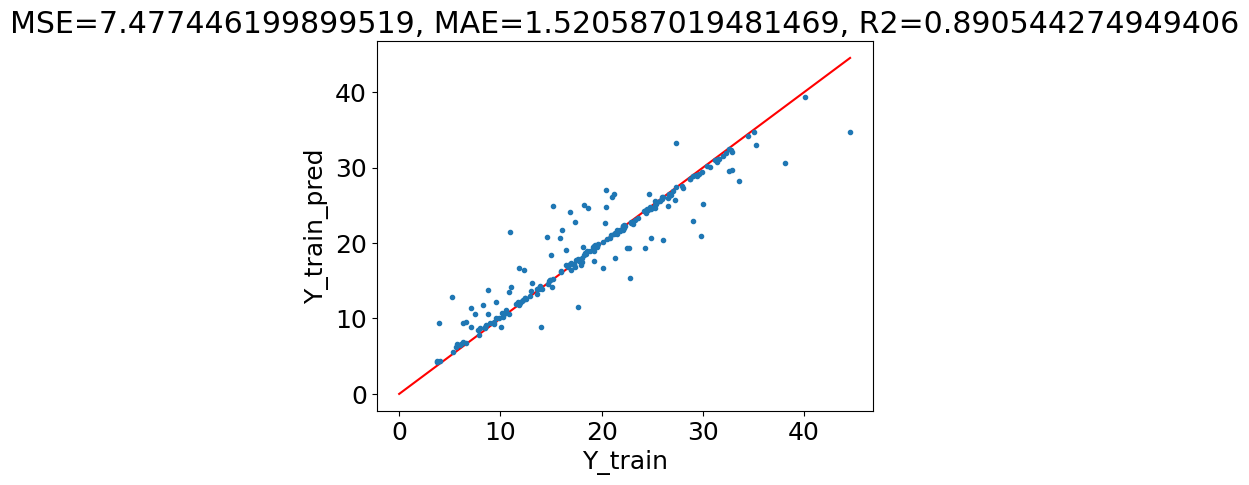

In [ ]:
from sklearn.metrics import r2_score

MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
R2 = r2_score(Y_train, Y_train_pred)
#
ymax=np.max([Y_train.max(), Y_train_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_train, Y_train_pred, '.')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

# Testing results:

Text(0.5, 1.0, 'MSE=17.32985394829446, MAE=3.486371363378038, R2=0.7603824543757912')

[WARNING] [2023-05-04 23:46:09,349:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,352:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,358:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,362:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,377:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,386:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,393:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,396:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[WARNING] [2023-05-04 23:46:09,423:matplotlib.font_manager] findfont: Font family 'Times New Roman' not found.
[

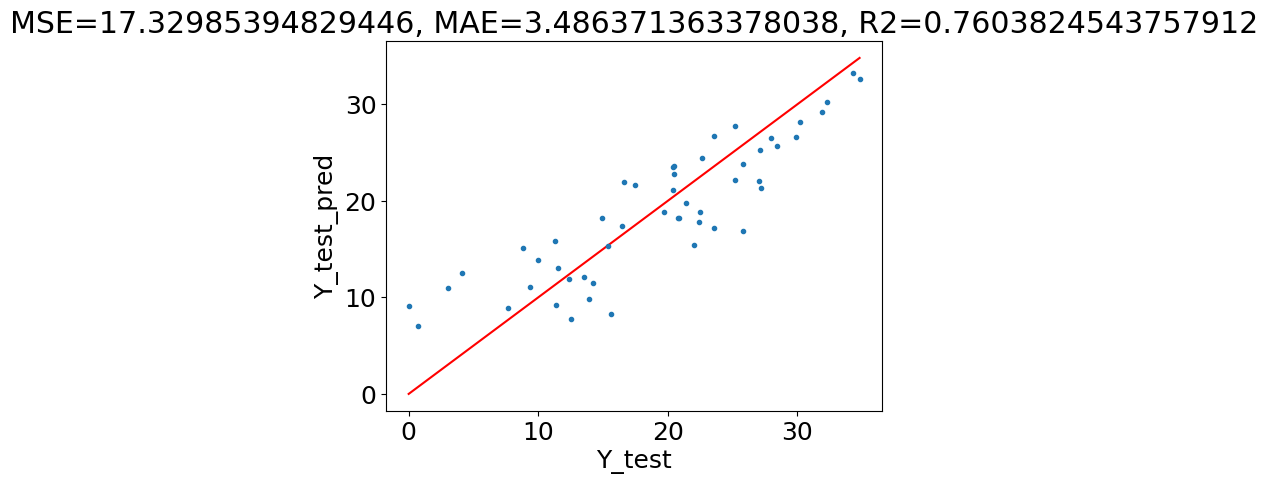

In [ ]:
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
R2 = r2_score(Y_test, Y_test_pred)
#
ymax=np.max([Y_test.max(), Y_test_pred.max()])
plt.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
plt.plot(Y_test, Y_test_pred, '.')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred')
plt.title('MSE='+str(MSE)+', MAE='+str(MAE)+', R2='+str(R2))

# Conclusion part 4:

Indeed, this model good performance overall, with the best performance on the training set until now. However, the networks we trained in part 3 performed better on the test set.